# Kyphosis Prediction with Decision Tree
This project analyzes the Kyphosis dataset to predict the presence or absence of Kyphosis (a spinal deformity) using a decision tree model. It involves data exploration, model building, evaluation, and visualization of the decision tree.

 **Steps:**
1.  Data Loading and Exploration
2.  Model Training and Prediction
3.  Model Evaluation
4.  Decision Tree Visualization







#1. Data Loading and Exploration.

*   Import Libraries



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



* Load Dataset



In [ ]:
df=pd.read_csv("kyphosis.csv")




*  Dataset Summary



In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [ ]:

df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


* Pair Plot Visualization:

 Visualize relationships between pairs of variables, with data points colored by the 'Kyphosis' status

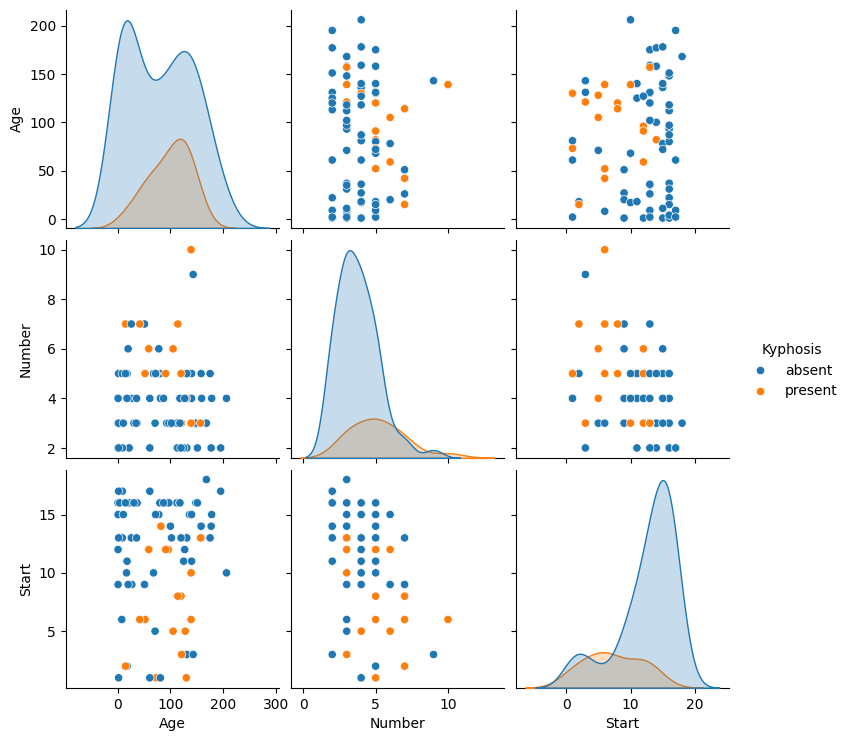

In [ ]:
sns.pairplot(data=df,hue='Kyphosis')


# 2. Model Training and Prediction

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X=df.drop('Kyphosis',axis=1)

In [ ]:
y=df['Kyphosis']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

* Decision Tree Classifier:

 Initialize and train a decision tree classifier using 'entropy' as the criterion to measure the quality of splits.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:

dtree=DecisionTreeClassifier(criterion='entropy')


In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

# 3. Model Evaluation


In [ ]:
predictions =dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

* Confusion Matrix:

In [ ]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[16  1]
 [ 3  5]]


* Classification Report:

 Evaluate the model's performance using a confusion matrix and classification report (precision, recall, F1-score, and support)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.84      0.94      0.89        17
     present       0.83      0.62      0.71         8

    accuracy                           0.84        25
   macro avg       0.84      0.78      0.80        25
weighted avg       0.84      0.84      0.83        25



# 4. Decision Tree Visualization
* Visualization Libraries:

In [ ]:
from IPython.display import Image

from six import StringIO

from sklearn.tree import export_graphviz

import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

*Export and Visualize Tree:

Generate a graphical representation of the decision tree to understand the decision-making process.



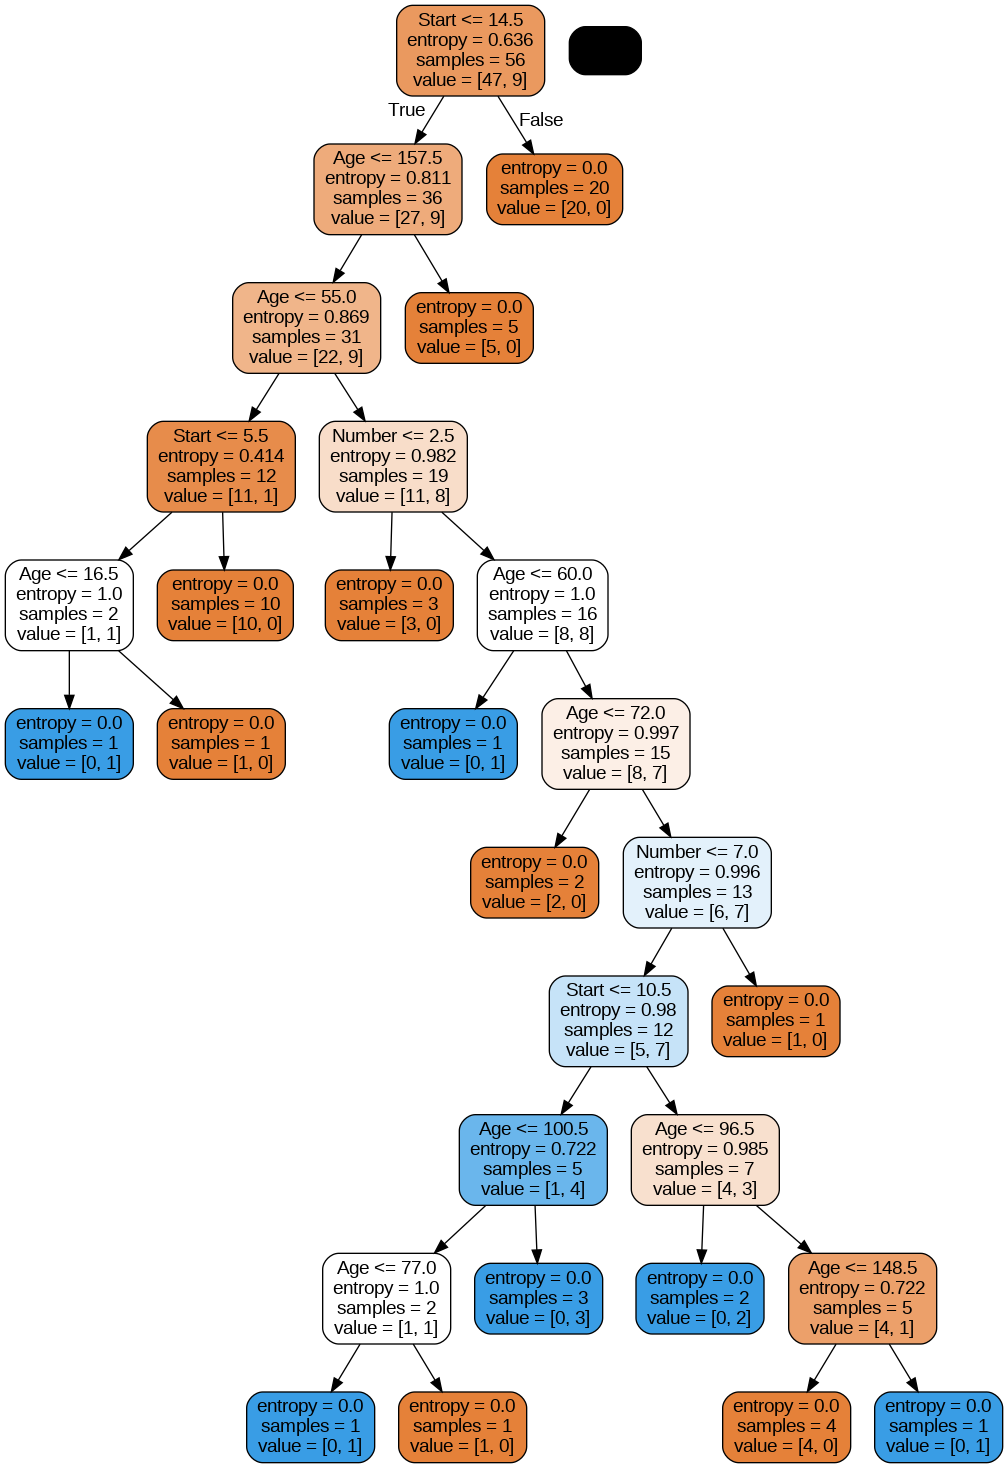

In [ ]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())